In [259]:
import numpy as np
import pandas as pd
from math import factorial as f
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [307]:
global p,q,n 
p= float(input("Enter the probability: "))
q = 1-p
n = int(input("Enter the number of trials: "))
def bndist(x):
    c1,c2,c3 = 0,0,0
    c1 = f(n)/(f(x)*f(n-x))
    c2 = p**x
    c3 = q**(n-x)
    return c1*c2*c3

Enter the probability: 0.75
Enter the number of trials: 10


Text(0.5, 1.0, 'Probability Distribution')

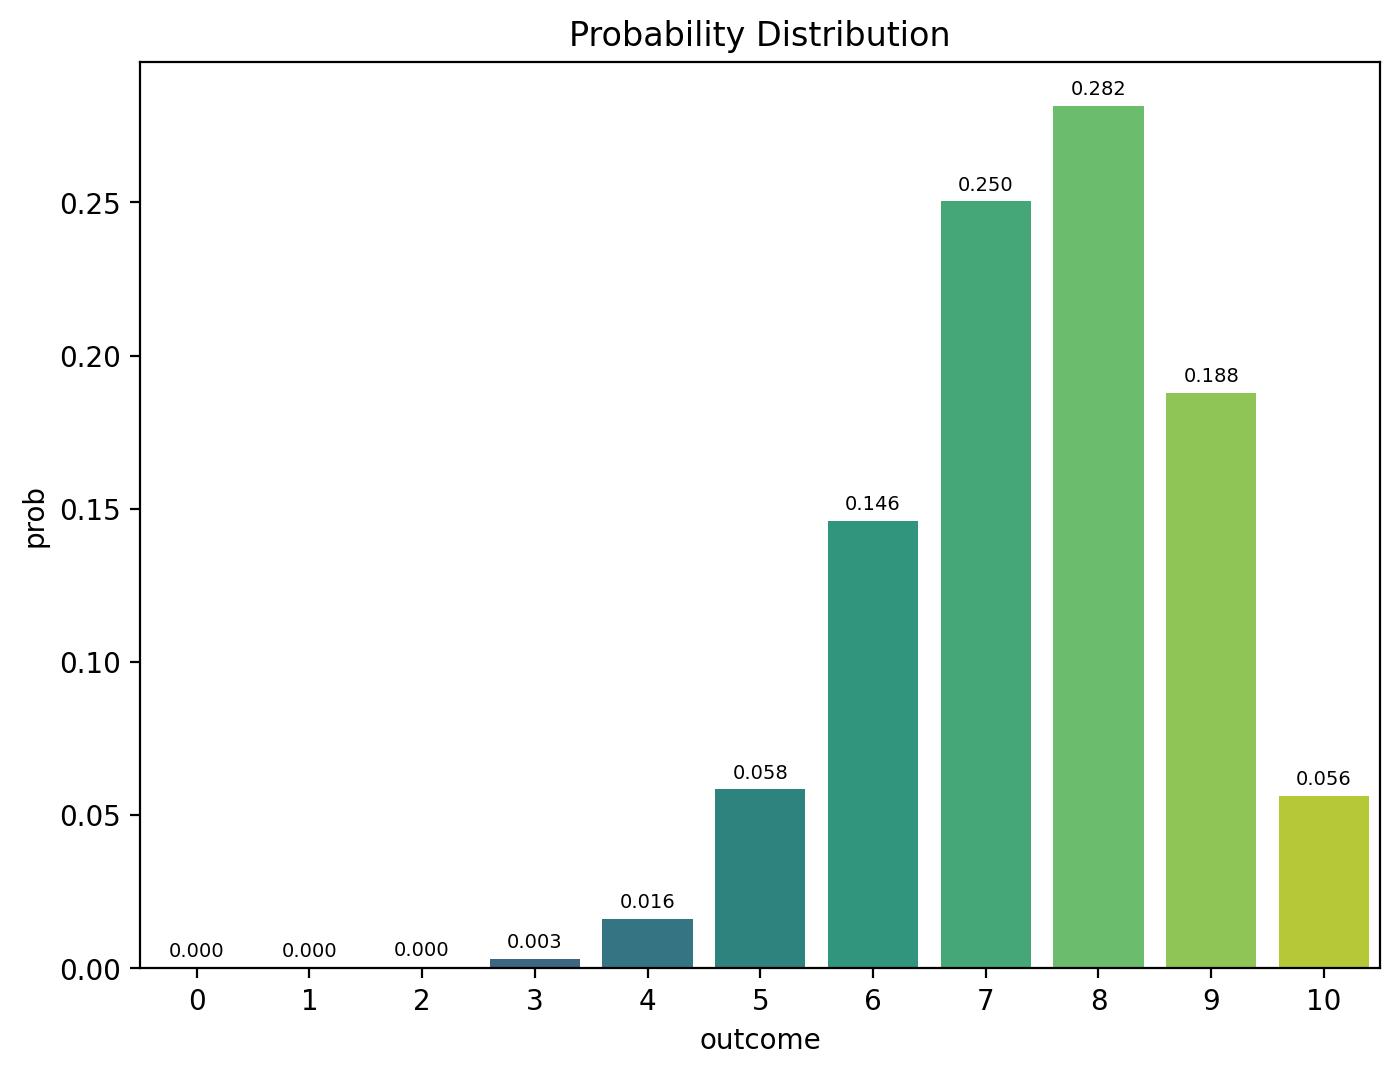

In [308]:
o = np.arange(n+1)
df = pd.DataFrame()
df['outcome'] = pd.Series(o)
df['prob'] = df['outcome'].apply(lambda x:bndist(x)).round(7)

plt.figure(figsize=(8,6),dpi=200)
barplot = sns.barplot(x = 'outcome', y = 'prob', data = df,palette='viridis')
#plt.xticks(df['outcome'][::20])

for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.3f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=7, xytext=(0, 6),
                   textcoords='offset points')

plt.title('Probability Distribution')

In [282]:
df

,outcome,prob
0,0,0.000001
1,1,0.000029
2,2,0.000386
3,3,0.003090
4,4,0.016222
5,5,0.058399
6,6,0.145998
7,7,0.250282
8,8,0.281568
9,9,0.187712


In [283]:
df['cdf'] = df['prob'].cumsum()
df

,outcome,prob,cdf
0,0,0.000001,0.000001
1,1,0.000029,0.000030
2,2,0.000386,0.000416
3,3,0.003090,0.003506
4,4,0.016222,0.019728
5,5,0.058399,0.078127
6,6,0.145998,0.224125
7,7,0.250282,0.474407
8,8,0.281568,0.755975
9,9,0.187712,0.943686


In [284]:
print("The probability of Joan making atleast 6 calls a day = ",1-df['prob'][0:6].sum())

The probability of Joan making atleast 6 calls a day =  0.9218731


In [285]:
from scipy.interpolate import make_interp_spline
x = df['outcome'].values
y = df['prob'].values
X_Y_Spline = make_interp_spline(x, y)
x = np.linspace(df['outcome'].min(),df['outcome'].max(),100)
y = X_Y_Spline(x)

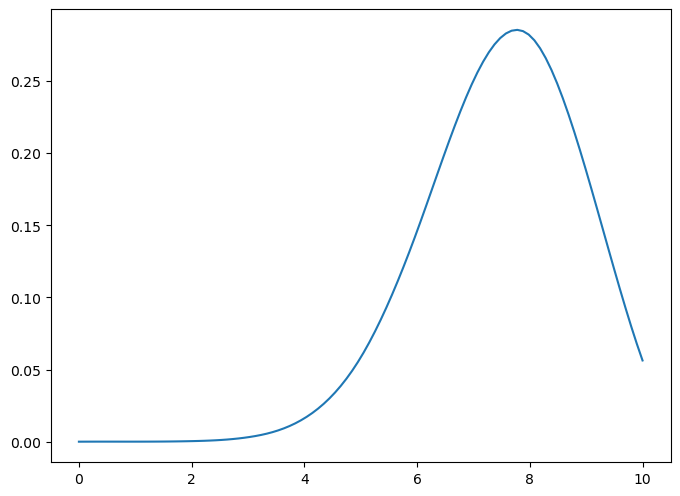

In [286]:
plt.figure(figsize=(8,6),dpi=100)
plt.plot(x ,y)